In [8]:
#导入必要的工具包
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import jieba
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [10]:
#导入切词后的数据
df=pd.read_excel('切词整理v2.xlsx',sheet_name='Sheet4')
df

,关键词,工作,环境,家庭,学习,词频,Tag
0,皮肤,3258,2386,2564,2378,10586,1
1,过敏,1445,1908,1489,1125,5967,1
2,宝宝,116,277,2820,30,3243,2
3,孩子,118,109,2833,118,3178,2
4,上班,2774,40,52,72,2938,2
...,...,...,...,...,...,...,...
122,粉尘,11,109,0,0,120,2
123,润肤霜,0,16,87,0,103,3
124,眼周,71,10,17,0,98,1
125,皮疹,0,91,0,0,91,1


In [11]:
#计算TF-IDF指数
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(df[['工作','环境','家庭','学习']])

In [12]:
tfidf_weight = tfidf.toarray()
attributes=pd.DataFrame(tfidf_weight)

In [13]:
attributes.head()

,0,1,2,3
0,0.586227,0.471740,0.468629,0.462802
1,0.451307,0.654788,0.472384,0.380037
2,0.040234,0.105569,0.993534,0.011255
3,0.040895,0.041508,0.997320,0.044233
4,0.999300,0.015833,0.019028,0.028054


In [14]:
#进行 k=4 的聚类操作
kmeans = KMeans(n_clusters=4)
kmeans.fit(tfidf_weight)
labels=[]

for index, label in enumerate(kmeans.labels_, 1):
    labels.append(label)
attributes['label']=labels

In [15]:
attributes

,0,1,2,3,label
0,0.586227,0.471740,0.468629,0.462802,0
1,0.451307,0.654788,0.472384,0.380037,3
2,0.040234,0.105569,0.993534,0.011255,1
3,0.040895,0.041508,0.997320,0.044233,1
4,0.999300,0.015833,0.019028,0.028054,0
...,...,...,...,...,...
122,0.091459,0.995809,0.000000,0.000000,3
123,0.000000,0.195116,0.980780,0.000000,1
124,0.960871,0.148705,0.233696,0.000000,0
125,0.000000,1.000000,0.000000,0.000000,3


In [16]:
#识别聚类中心
centers=kmeans.cluster_centers_
centers

array([[0.76073333, 0.25027988, 0.35339481, 0.33850682],
       [0.30884201, 0.24998187, 0.83266082, 0.15114178],
       [0.21123625, 0.0274917 , 0.12309378, 0.93345429],
       [0.34569964, 0.83863694, 0.26883675, 0.11699967]])

In [37]:
#Pearson相关关系显著性检验
import scipy

significance=[]
for index, content in attributes.iterrows():
    for center_id in range(0,len(centers)):
        if content['label']==center_id:
            x=[content[0],content[1],content[2],content[3]]
            y=centers[center_id]
            if scipy.stats.pearsonr(x,y)[1]<=0.1:
                significance.append(1)
            else:
                significance.append(0)
            

In [38]:
significance

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [39]:
#显著性检验结果加入数据框
attributes['significance']=significance

In [29]:
#TSNE降维并可视化
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmeans.labels_, marker="x")
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

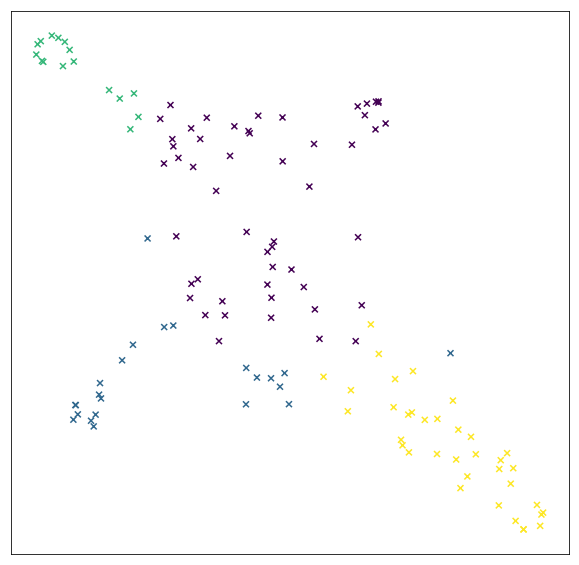

In [21]:
plt.show()

In [30]:
#将降维后的横纵坐标加入数据框
attributes['x']=x
attributes['y']=y
attributes['关键词']=df['关键词']
attributes['Tag']=df['Tag']

In [31]:
attributes

,0,1,2,3,label,significance,x,y,关键词,Tag
0,0.586227,0.471740,0.468629,0.462802,0,0,-2.090180,1.620024,皮肤,1
1,0.451307,0.654788,0.472384,0.380037,3,0,1.931477,-0.295233,过敏,1
2,0.040234,0.105569,0.993534,0.011255,1,0,-2.038851,-4.963646,宝宝,2
3,0.040895,0.041508,0.997320,0.044233,1,0,-2.393560,-5.086164,孩子,2
4,0.999300,0.015833,0.019028,0.028054,0,0,-4.109584,6.455674,上班,2
...,...,...,...,...,...,...,...,...,...,...
122,0.091459,0.995809,0.000000,0.000000,3,1,6.997306,1.562498,粉尘,2
123,0.000000,0.195116,0.980780,0.000000,1,0,-1.871996,-5.020203,润肤霜,3
124,0.960871,0.148705,0.233696,0.000000,0,0,-3.594510,5.856849,眼周,1
125,0.000000,1.000000,0.000000,0.000000,3,0,7.584708,1.378935,皮疹,1


In [40]:
#输出保存数据框
attributes.to_excel('social_landscape.xlsx')